In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
import plotly.plotly as py
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

In [6]:
df=pd.read_csv('911.csv')
df.head() # e is dummy column

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [8]:
df['zip'].head(5)

0    19525.0
1    19446.0
2    19401.0
3    19401.0
4        NaN
Name: zip, dtype: float64

In [9]:
df['twp'].head(5)

0          NEW HANOVER
1    HATFIELD TOWNSHIP
2           NORRISTOWN
3           NORRISTOWN
4     LOWER POTTSGROVE
Name: twp, dtype: object

In [10]:
df['title'].nunique()

110

In [11]:
df['title']

0                EMS: BACK PAINS/INJURY
1               EMS: DIABETIC EMERGENCY
2                   Fire: GAS-ODOR/LEAK
3                EMS: CARDIAC EMERGENCY
4                        EMS: DIZZINESS
5                      EMS: HEAD INJURY
6                  EMS: NAUSEA/VOMITING
7            EMS: RESPIRATORY EMERGENCY
8                 EMS: SYNCOPAL EPISODE
9           Traffic: VEHICLE ACCIDENT -
10          Traffic: VEHICLE ACCIDENT -
11          Traffic: VEHICLE ACCIDENT -
12          Traffic: VEHICLE ACCIDENT -
13          Traffic: VEHICLE ACCIDENT -
14          Traffic: VEHICLE ACCIDENT -
15          Traffic: VEHICLE ACCIDENT -
16           EMS: RESPIRATORY EMERGENCY
17                       EMS: DIZZINESS
18                EMS: VEHICLE ACCIDENT
19          Traffic: DISABLED VEHICLE -
20          Traffic: VEHICLE ACCIDENT -
21          Traffic: DISABLED VEHICLE -
22                 Fire: APPLIANCE FIRE
23          Traffic: DISABLED VEHICLE -
24          Traffic: VEHICLE ACCIDENT -


In [12]:
def saperate(text):
        return text.split(':')[0]

In [13]:
b=df['title'].iloc[2]
b

'Fire: GAS-ODOR/LEAK'

In [14]:
b.split(':')[0]

'Fire'

In [15]:
df['title'].apply(saperate)

0            EMS
1            EMS
2           Fire
3            EMS
4            EMS
5            EMS
6            EMS
7            EMS
8            EMS
9        Traffic
10       Traffic
11       Traffic
12       Traffic
13       Traffic
14       Traffic
15       Traffic
16           EMS
17           EMS
18           EMS
19       Traffic
20       Traffic
21       Traffic
22          Fire
23       Traffic
24       Traffic
25           EMS
26           EMS
27          Fire
28       Traffic
29       Traffic
          ...   
99462        EMS
99463        EMS
99464        EMS
99465        EMS
99466        EMS
99467        EMS
99468       Fire
99469       Fire
99470        EMS
99471        EMS
99472        EMS
99473        EMS
99474        EMS
99475    Traffic
99476        EMS
99477        EMS
99478    Traffic
99479        EMS
99480        EMS
99481        EMS
99482    Traffic
99483        EMS
99484       Fire
99485    Traffic
99486    Traffic
99487    Traffic
99488    Traffic
99489        E

In [16]:
df['Reasons']=df['title'].apply(saperate)

In [17]:
df['timeStamp']

0        2015-12-10 17:40:00
1        2015-12-10 17:40:00
2        2015-12-10 17:40:00
3        2015-12-10 17:40:01
4        2015-12-10 17:40:01
5        2015-12-10 17:40:01
6        2015-12-10 17:40:01
7        2015-12-10 17:40:01
8        2015-12-10 17:40:01
9        2015-12-10 17:40:01
10       2015-12-10 17:40:01
11       2015-12-10 17:40:02
12       2015-12-10 17:40:02
13       2015-12-10 17:40:02
14       2015-12-10 17:40:02
15       2015-12-10 17:40:02
16       2015-12-10 17:46:01
17       2015-12-10 17:47:01
18       2015-12-10 17:47:01
19       2015-12-10 17:47:02
20       2015-12-10 17:47:02
21       2015-12-10 17:57:02
22       2015-12-10 18:02:01
23       2015-12-10 18:02:02
24       2015-12-10 18:02:02
25       2015-12-10 18:06:25
26       2015-12-10 18:06:25
27       2015-12-10 18:06:25
28       2015-12-10 18:06:26
29       2015-12-10 18:11:01
                ...         
99462    2016-08-24 09:41:00
99463    2016-08-24 09:42:00
99464    2016-08-24 09:51:06
99465    2016-

In [18]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reasons
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


In [19]:
df['Reasons'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reasons, dtype: int64

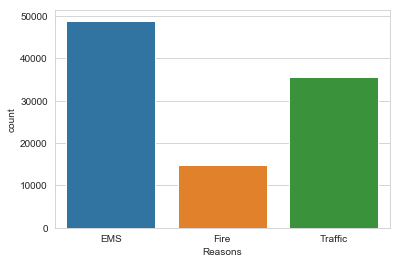

In [20]:
sns.set_style('whitegrid')
sns.countplot(data=df,x='Reasons')

In [21]:
type('timeStamp')

str

In [22]:
df['timeStamp']=pd.to_datetime(df['timeStamp'])

In [23]:
def second(timeStamp):
    return timeStamp.second

In [24]:
def minute(timeStamp):
    return timeStamp.minute

In [25]:
def hour(timeStamp):
    return timeStamp.hour

In [26]:
def Day(timeStamp):
    return timeStamp.dayofweek

In [27]:
def month(timeStamp):
    return timeStamp.month

In [28]:
df['Second']=df['timeStamp'].apply(second)
df['Minute']=df['timeStamp'].apply(minute)
df['Hour']=df['timeStamp'].apply(hour)
df['Day']=df['timeStamp'].apply(Day)
df['Month']=df['timeStamp'].apply(month)
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reasons,Second,Minute,Hour,Day,Month
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,0,40,17,3,12
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,0,40,17,3,12
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,0,40,17,3,12
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,1,40,17,3,12
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,1,40,17,3,12
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 17:40:01,LANSDALE,CANNON AVE & W 9TH ST,1,EMS,1,40,17,3,12
6,40.182111,-75.127795,LAUREL AVE & OAKDALE AVE; HORSHAM; Station 35...,19044.0,EMS: NAUSEA/VOMITING,2015-12-10 17:40:01,HORSHAM,LAUREL AVE & OAKDALE AVE,1,EMS,1,40,17,3,12
7,40.217286,-75.405182,COLLEGEVILLE RD & LYWISKI RD; SKIPPACK; Stati...,19426.0,EMS: RESPIRATORY EMERGENCY,2015-12-10 17:40:01,SKIPPACK,COLLEGEVILLE RD & LYWISKI RD,1,EMS,1,40,17,3,12
8,40.289027,-75.399590,MAIN ST & OLD SUMNEYTOWN PIKE; LOWER SALFORD;...,19438.0,EMS: SYNCOPAL EPISODE,2015-12-10 17:40:01,LOWER SALFORD,MAIN ST & OLD SUMNEYTOWN PIKE,1,EMS,1,40,17,3,12
9,40.102398,-75.291458,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD; PLYM...,19462.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:40:01,PLYMOUTH,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD,1,Traffic,1,40,17,3,12


In [29]:
dmap={0:'mon',1:'tue',2:'wed',3:'thurs',4:'fri',5:'sat',6:'sun'}
gmap={1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct'
             ,11:'nov',12:'dec'}

In [30]:
df['Day']=df['Day'].map(dmap)

df.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reasons,Second,Minute,Hour,Day,Month
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,0,40,17,thurs,12
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,0,40,17,thurs,12


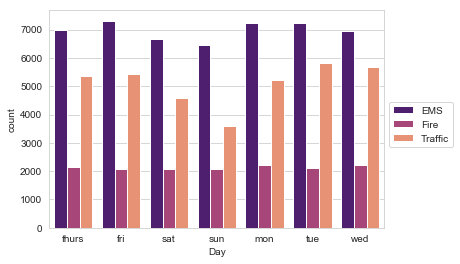

In [31]:
sns.countplot(x='Day',data=df,hue='Reasons',palette='magma')
plt.legend(loc=2,bbox_to_anchor=(1,0.6))

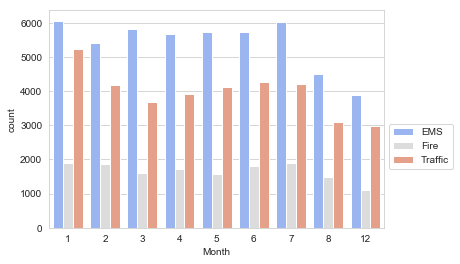

In [32]:
sns.countplot(x='Month',data=df,hue='Reasons',palette='coolwarm')
plt.legend(loc=2,bbox_to_anchor=(1,0.5))

In [33]:
bymonth=df.groupby('Month').count()
bymonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reasons,Second,Minute,Hour,Day
Month,,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969,7969,7969


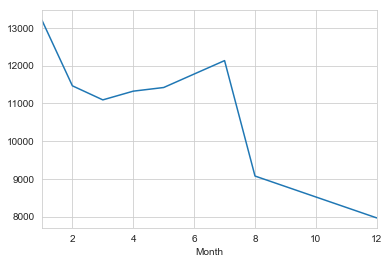

In [34]:
bymonth['twp'].plot()

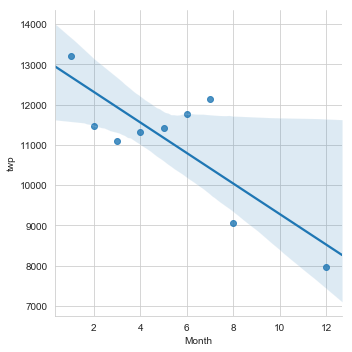

In [35]:
sns.lmplot(x='Month',y='twp',data=bymonth.reset_index())

In [36]:
def date(timeStamp):
    return timeStamp.date()

In [37]:
df['timeStamp'].apply(date).iloc[0]

datetime.date(2015, 12, 10)

In [38]:
df['Date']=df['timeStamp'].apply(date)
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reasons,Second,Minute,Hour,Day,Month,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,0,40,17,thurs,12,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,0,40,17,thurs,12,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,0,40,17,thurs,12,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,1,40,17,thurs,12,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,1,40,17,thurs,12,2015-12-10
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 17:40:01,LANSDALE,CANNON AVE & W 9TH ST,1,EMS,1,40,17,thurs,12,2015-12-10
6,40.182111,-75.127795,LAUREL AVE & OAKDALE AVE; HORSHAM; Station 35...,19044.0,EMS: NAUSEA/VOMITING,2015-12-10 17:40:01,HORSHAM,LAUREL AVE & OAKDALE AVE,1,EMS,1,40,17,thurs,12,2015-12-10
7,40.217286,-75.405182,COLLEGEVILLE RD & LYWISKI RD; SKIPPACK; Stati...,19426.0,EMS: RESPIRATORY EMERGENCY,2015-12-10 17:40:01,SKIPPACK,COLLEGEVILLE RD & LYWISKI RD,1,EMS,1,40,17,thurs,12,2015-12-10
8,40.289027,-75.399590,MAIN ST & OLD SUMNEYTOWN PIKE; LOWER SALFORD;...,19438.0,EMS: SYNCOPAL EPISODE,2015-12-10 17:40:01,LOWER SALFORD,MAIN ST & OLD SUMNEYTOWN PIKE,1,EMS,1,40,17,thurs,12,2015-12-10
9,40.102398,-75.291458,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD; PLYM...,19462.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:40:01,PLYMOUTH,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD,1,Traffic,1,40,17,thurs,12,2015-12-10


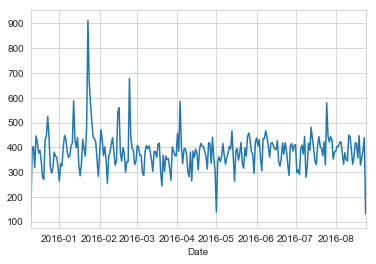

In [39]:
byDate=df.groupby('Date').count()
byDate['twp'].plot()

In [40]:
byReasons=df.groupby('Reasons').count()
byReasons

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Second,Minute,Hour,Day,Month,Date
Reasons,,,,,,,,,,,,,,,
EMS,48877,48877,48877,44327,48877,48877,48853,48877,48877,48877,48877,48877,48877,48877,48877
Fire,14920,14920,14920,13012,14920,14920,14903,14900,14920,14920,14920,14920,14920,14920,14920
Traffic,35695,35695,35695,29298,35695,35695,35693,35196,35695,35695,35695,35695,35695,35695,35695


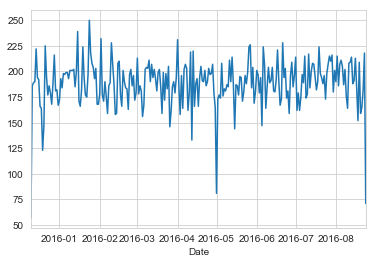

In [41]:
a=df[df['Reasons']=='EMS'].groupby('Date').count()
a['twp'].plot()

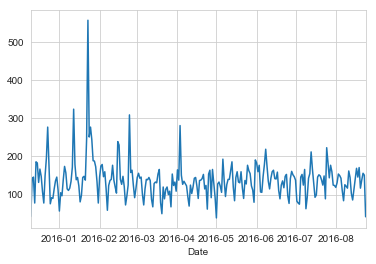

In [42]:
b=df[df['Reasons']=='Traffic'].groupby('Date').count()
b['twp'].plot()

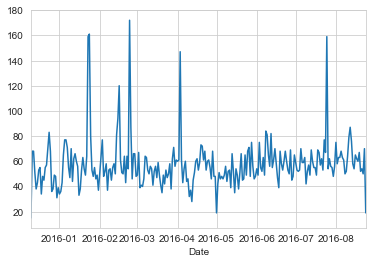

In [43]:
c=df[df['Reasons']=='Fire'].groupby('Date').count()
c['twp'].plot()

In [44]:
x=df.groupby('Reasons').count()
x

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Second,Minute,Hour,Day,Month,Date
Reasons,,,,,,,,,,,,,,,
EMS,48877,48877,48877,44327,48877,48877,48853,48877,48877,48877,48877,48877,48877,48877,48877
Fire,14920,14920,14920,13012,14920,14920,14903,14900,14920,14920,14920,14920,14920,14920,14920
Traffic,35695,35695,35695,29298,35695,35695,35693,35196,35695,35695,35695,35695,35695,35695,35695


In [45]:
x=df.groupby(by=['Day','Hour']).count()['Reasons'].unstack()
x

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day,,,,,,,,,,,,,,,,,,,,,
fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
thurs,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


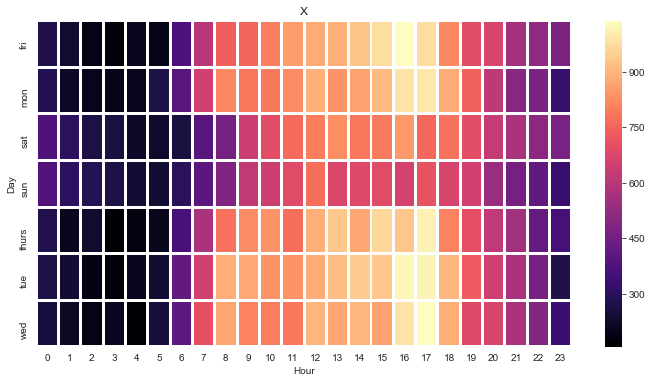

In [46]:
plt.figure(figsize=(12,6))
plt.title('X')
sns.heatmap(data=x,cmap='magma',linewidth=2,linecolor='white')

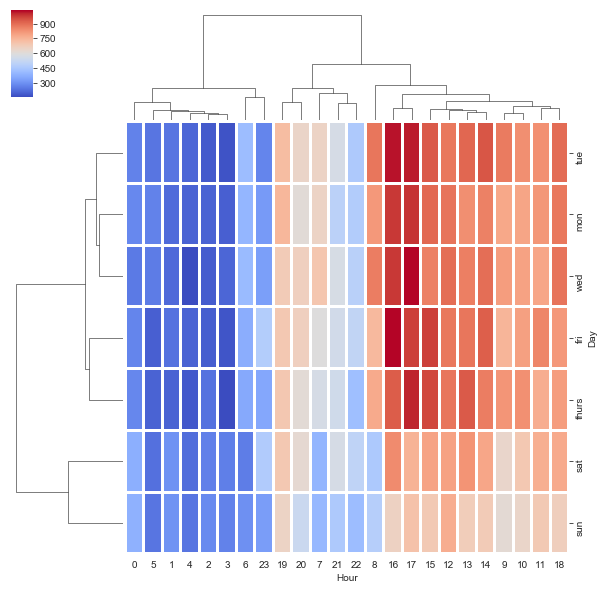

In [47]:
sns.clustermap(cmap='coolwarm',data=x,linewidth=2,linecolor='white')

In [48]:
y=df.groupby(by=['Month','Hour']).count()['Reasons'].unstack()
y

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Month,,,,,,,,,,,,,,,,,,,,,
1,294,218,225,205,205,214,386,551,755,752,...,775,691,725,871,798,687,592,507,421,345
2,267,194,161,149,161,213,325,550,597,603,...,648,704,692,674,693,578,518,453,426,327
3,214,181,194,149,152,181,291,487,556,614,...,672,707,782,676,600,547,493,402,359,273
4,243,204,170,161,179,178,316,482,613,598,...,705,728,767,728,646,533,472,377,309,282
5,255,195,158,173,160,196,254,439,605,644,...,640,746,728,787,608,510,489,462,405,283
6,229,192,168,157,148,172,290,436,565,630,...,726,767,817,769,693,563,496,456,399,306
7,241,224,181,188,177,196,279,431,545,635,...,791,744,815,826,675,652,583,481,433,292
8,219,182,166,135,131,144,188,326,466,465,...,552,612,656,564,476,419,373,345,245,247
12,150,131,126,118,105,135,184,268,342,373,...,488,455,508,622,573,419,361,305,286,204


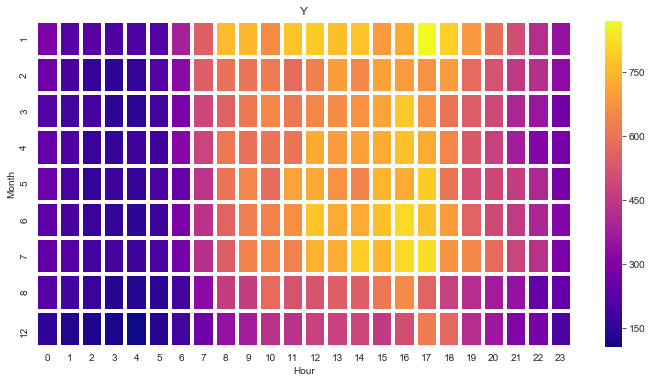

In [49]:
plt.figure(figsize=(12,6))
plt.title('Y')
sns.heatmap(cmap='plasma',data=y,linecolor='white',linewidth=3)

Text(0.5, 1.0, 'Y')

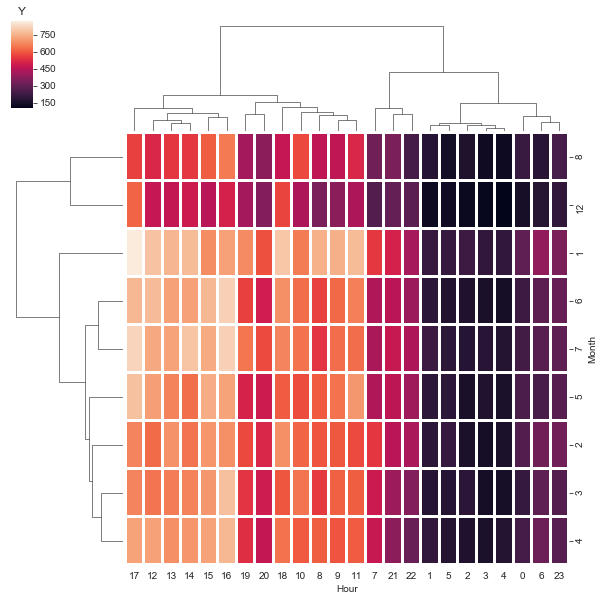

In [50]:
sns.clustermap(data=y,linewidth=2,linecolor='white')
plt.title('Y')